## Mecab インストール

In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n

!sed -e "s!/var/lib/mecab/dic/debian!/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd!g" /etc/mecabrc &gt; /etc/mecabrc.new
!cp /etc/mecabrc /etc/mecabrc.org
!cp /etc/mecabrc.new /etc/mecabrc

## データ準備

In [ ]:
### SummaRuNNer: A Recurrent Neural Network Based Sequence Model for Extractive Summarization of Documents
doc0 = """
本研究では、Recurrent Neural Network（RNN）ベースのシーケンスモデルであるSummaRuNNerを発表し、最先端の技術よりも優れた、あるいは同等の性能を達成することを示した。==
私たちのモデルは、情報量、重要性、新しさなどの抽象的な特徴に基づいて予測を視覚化できるため、非常に解釈しやすいという利点もあります。==
もう一つの新しい貢献は、抽出モデルの抽象化学習で、人間が生成した参考文献の要約だけで学習することができ、文レベルの抽出ラベルを必要としません。==
文書の要約は、情報検索や自然言語理解に多くの応用がある重要な問題である。==
要約技術は主に抽出型と抽象型の2つに分類されます。==
抽出型の手法は、文書の中から注目すべきスニペット、センテンス、またはパッセージを選択することを目的とし、抽象型の要約手法は、文書の中の情報内容を簡潔に言い換えることを目的としています。==
文書の要約に関する文献の大部分は、抽出型の要約に費やされている。==
従来の抽出型要約の手法は、大きく分けて、欲張りなアプローチ（例：(Carbonell and Goldstein 1998)）、グラフベースのアプローチ（例：(Radev and Erkan 2004)）、制約最適化ベースのアプローチ（例：(McDonald 2007)）に分類される。==
近年、ニューラルネットワークを利用した抽出型の要約手法が注目されています。==
例えば、(Kageback et al. 2014)は、再帰的オートエンコーダー(Socher et al. 2011)を採用して文書を要約し、Opinosisデータセット(Ganesan, Zhai, and Han 2010)で最高の性能を発揮しました。==
Yin and Pei 2015）は、畳み込みニューラルネットワーク（CNN）を適用して、文章を連続ベクトル空間に投影し、「威信」と「多様性」に基づいてコストを最小化することで文章を選択し、マルチドキュメント抽出型要約のタスクに適用した。==
もう1つの関連研究は、CNNを使ったクエリに焦点を当てたマルチドキュメントの要約の問題に取り組んでいる(Cao et al. 2016)で、ここではドキュメントを表現するために文表現に対する重み付き和プーリングを使用している。==
重みは、クエリに基づく文の表現に対する注意から学習されます。==
最近では、テキスト用の強力な生成ニューラルモデルが登場したこともあり（Bahdanau, Cho, and Bengio 2014）、抽象化技術も普及しつつあります。==
例えば、(Rush, Chopra, and Weston 2015)は、文を短い見出しに抽象的に要約するための注意フィードフォワードネットワークを提案した。==
彼らの研究をさらに発展させた(Nallapati, Zhou, and Xiang 2016)は、リカレントニューラルネットワークベースのエンコーダ・デコーダモデルのセットを提案しています。このモデルは、語彙力のない単語の処理や、文中の単語の構文的特徴のモデル化など、要約のさまざまな側面に焦点を当てています。==
また、後続の研究(Nallapati et al. 2016)では、CNN/DailyMailコーパスを用いて、大規模文書を複数文の要約にまとめる抽象化技術を提案しています。==
抽象化技術が登場したにもかかわらず、抽出技術は、複雑さやコストが少なく、文法的・意味的に正しい要約を生成することができるため、依然として魅力的です。==
ごく最近の研究では、ChengとLapata（2016）が、抽出的な単一文書の要約のためのアテンション・エンコーダ・デコーダを提案し、CNN/Daily Mailコーパスに適用した。==
(Cheng and Lapata 2016)と同様に、我々の研究もニューラルネットワークを用いた単一文書のセンテンス抽出型要約のみに焦点を当てています。我々の実験には、(Nallapati et al. 2016)と(Cheng and Lapata 2016)が使用したのと同じコーパスを使用していますが、これはその大きなサイズが我々のような数千個のパラメータを持つ深層ニューラルネットワークの学習に魅力的だからです。==
我々の主な貢献は以下の通りである。(a) シンプルなリカレントネットワークベースのシーケンス分類器であるSummaRuNNerを提案し、抽出型要約のための最新モデルを凌駕またはマッチさせる。==
SummaRuNNerは、最先端の性能に加えて、非常に解釈しやすいという利点があります。==
分類層の項が明確に分かれているため（式6参照）、各文の分類に関わる様々な要因を解明することができます。==
これを図2に示します。ここでは、検証セットの代表的な文書と、その最終的な分類を担当した各抽象的特徴の正規化スコアを表示しています。==
このような視覚化は、システムが行った決定をエンドユーザーに説明する際に特に有効です。==
また，Daily MailコーパスとDUCコーパスからいくつかの例文を表示し，SummaRuNNerが選んだ文を強調して，表5の金色の要約と比較した．==
これらの例は、SummaRuNNerがドキュメントのキーポイントを特定する上で適度に良い仕事をすることを定性的に示しています。==
本研究では、直感的な可視化が可能な抽出型文書要約のための非常に解釈可能なニューラルシーケンスモデルを提案し、最先端の深層学習モデルよりも優れた性能を発揮する、あるいは同等の性能を発揮することを示します。==
また、学習時にラベルを抽出する必要をなくすために、新しい抽象的な学習メカニズムを提案していますが、このアプローチは、ほとんどのデータセットにおいて、私たちの抽出的な学習に比べて、まだ2、3のルージュポイントしかありません。==
今後は、抽出的アプローチと抽象的アプローチの組み合わせをさらに検討していく予定です。==
単純なアプローチとしては、抽象的なトレーニングを用いて抽出モデルを事前にトレーニングすることが考えられます。==
さらに、抽出部の予測値が抽象部で消費される確率的な中間ユニットを形成するような、抽出・抽象の合同モデルの構築を計画しています。==
"""

In [ ]:
### Salience Estimation via Variational Auto-Encoders for Multi-Document Summarization
doc1 = """
本研究では、マルチドキュメントサマリゼーション（MDS）のための新しい教師なし文サリエンスフレームワークを提案する。このフレームワークは、潜在的意味モデリングとサリエンス推定の2つのコンポーネントに分けられる。==
潜在的意味モデリングでは、観測された文とそれに対応する潜在的意味表現を記述するために、Variational Auto-Encoders (VAEs) と呼ばれるニューラル生成モデルを採用する。==
また、潜在変数の事後推論には、ニューラル変分推論を用いる。==
本研究では、潜在的意味空間と観測された項ベクトル空間の再構成を共同で考慮する、教師なしデータ再構成フレームワークを提案する。==
これは、潜在的な意味空間と観測された用語のベクトル空間の再構成を共同で行うものであり、これら2つの異なる補完的なベクトル空間から文のサリエンスを捉えることができる。==
その後，VAEsに基づく潜在的意味モデルを文の重要度推定コンポーネントに統合し，マルチタスク学習によるバックプロパゲーションによってフレームワーク全体を共同で学習することができる。==
ベンチマークデータであるDUCとTACを用いた実験の結果、本研究のフレームワークは、最先端のモデルよりも優れた性能を達成した。==
マルチドキュメントサマリゼーション（MDS）は、異なるソースからのドキュメントセットでイベントを記述するトピックに対して、簡潔でよくまとまったサマリを自動的に生成することを目的としており、広く研究されています。==
(Goldstein et al. 2000; Erkan and Radev 2004; Wan, Yang, and Xiao 2007; Nenkova and McKeown 2012; Min, Chew, and Tan 2012; Bing et al. 2015)。==
Summarizationアプローチは、抽出ベースの手法と抽象化ベースの手法の2つのクラスに分類されます。==
どちらのクラスでも、パフォーマンスを向上させるためには、サリエンス推定が重要な役割を果たします。==
ラベリングされたMDSデータセットのスケーラビリティの制約を考慮して、いくつかの作品では、教師なしのデータ再構成法を採用してサリエンス推定を行い、同等の結果を得ています（He et al 2012; Liu, Yu, and Deng 2015; Yao, Wan, and Xiao 2015; Li et al 2015; Ren et al 2016; Song et al 2017）。==
これらの作品を調査した結果、主にBag-of-Words (BoWs) ベクトルを文の表現と再構成損失関数に使用していることがわかりました。==
一方、いくつかの研究成果（Le and Mikolov 2014; Kim 2014）では、文や文書のセマンティクスをモデル化する際に、分散表現がBoWを上回ることが実証されています。==
本論文では、BoWsベクトルを使用する代わりに、MDSタスクのために文の潜在的なセマンティクスをモデル化するための分散表現を探ります。==
我々は、観測された文と潜在的な意味ベクトルを記述するために、確率的な生成モデルに基づいたフレームワークを提案する。==
一連の文書で構成されるトピック（イベント）が与えられたとき、各文をモデル化するための分散潜在的意味ベクトルを生成的フレームワークで構築し、各文は観測されていない潜在的意味空間から生成されます。==
もう一つの特徴は、生成過程において、潜在的な意味ベクトル上の分布を近似するために、入力テキストを条件としたニューラルネットワークを採用していることです。==
Markov Chain Monte Carlo（MCMC）サンプリングとVariational Inference（VI）は、生成モデルで使用される最も一般的な手法です（Jordan et al 1999; Wainwright and Jordan 2008; Blei, Kucukelbir, and McAuliffe 2016）。==
しかし、連続的な潜在変数やニューラルネットワークベースの生成モデリングのために、限界尤度の積分の一部は難解です。==
平均場アルゴリズム（Xing, Jordan, and Russell 2002）のような標準的な変分推論法は使用できません。==
さらに、MCMCベースのサンプリング手法は、大規模な機械学習タスクに拡張するには遅すぎます。==
最近では、複雑な生成モデリングフレームワークに関連する推論問題を扱うことができる Variational Autoencoders (VAEs) (Kingma and Welling 2014; Rezende, Mohamed, and Wierstra 2014) や Generative Adversarial Networks (GANs) (Goodfellow et al. 2014; Radford, Metz, and Chintala 2015) が提案されている。==
私たちの研究では、生成モデルの基本的な枠組みとしてVAEを採用しています。==
実際、いくつかの作品（Miao, Yu, and Blunsom 2015; Chung et al. 2015）では、VAEが一般的なリカレントニューラルネットワーク（RNN）やコンボリューショナルニューラルネットワーク（CNN）よりも高レベルの意味表現を生成する能力が高いことが実証されています。==
MDSにおける文の重要度推定問題を解決するために、我々は潜在的意味空間と観測された用語ベクトル空間を共同で再構成する教師なしデータ再構成フレームワークを提案する。==
データ再構成の基本的な考え方は、各原文は、他のいくつかの代表的な文の線形結合を用いて再構成できるというものです。==
これらの代表的な文章は、「何が起こったか」、「損害」、「対策」など、事象に込められた様々な側面を捉えることができます。==
アスペクト文を表現するためのベクトルを、アスペクト・ベクトルと名付けます。==
そして、アスペクト・ベクトルを用いて、再構成の際にサルーン推定を行うことができます。==
生成モデルとデータ再構築プロセスの精神に基づいて、いくつかの潜在的なアスペクト・ベクトルを設計し、それらを使って元の潜在的な意味空間全体を再構築します。==
このようなアイデアと並行して、元の観測された用語ベクトル空間を再構築するために使用されるいくつかのアスペクト用語ベクトルも設計します。==
その後、VAEsに基づく潜在的意味モデルを文の重要度推定コンポーネントに統合し、マルチタスク学習によるバックプロパゲーションによってフレームワーク全体を共同で学習することができます。==
文の重要度を推定した後、フレーズの結合に基づく統一的な最適化フレームワークを採用し、最終的な要約を生成します。==
我々の貢献は以下の通りです。(1)文の潜在的意味モデル化を行うためのVAEベースの生成モデルを提案する。==
私たちの知る限りでは、要約関連のタスクにVAEを使用することを検討している他の研究はありません。==
(2) 本フレームワークでは、潜在的な意味空間と観測された入力項のベクトル空間を共同で考慮することで、これらの異なる補完的な空間からより豊かな情報を引き出すことができる、ということです。==
(3)VAEsベースの生成モデルとサリエンス推定コンポーネントを統一されたフレームワークに統合し、バックプロパゲーションを用いたマルチタスク学習で同時に学習できるようにした。==
(4) ベンチマークデータセットであるDUCとTACでの実験結果は、本フレームワークが最先端のモデルよりも優れた性能を達成することを示している。==
私たちのフレームワークの性能を過去の手法と比較するためには、まず、彼らのシステムが作成したサマリーを入手すること（または、彼らのコードを入手して自分たちでサマリーを作成すること）が優先されます。==
そして、同じオプションでROUGE評価を行います。==
我々のシステムを、いくつかの要約のベースラインや既存の教師なしの手法と比較した。==
ランダムベースラインは、各トピックの文章をランダムに選択します。==
Lead baseline (Wasson 1998) は、ニュースを時系列にランク付けし、先頭のセンテンスを1つずつ抽出します。==
また、スパースコーディングに基づく他の3つの教師なしの既存手法、すなわちDSDR（He et al 2012）、MDS-Sparse（Liu, Yu, and Deng 2015）、RA-MDS（Li et al 2015）も比較しています。==
ABSPhrase (Bing et al. 2015) は、フレーズベースの最適化フレームワークを用いて、重み付けされた用語の頻度をサリエンスの推定値として、抽象的なサマリーを生成します。==
さらに、SpOpt(Yao, Wan, and Xiao 2015)も論文の中で良い結果を提示しているが、彼らのシステムを忠実に再現するように再構築することは困難であることを言及しておきたい。==
表1および表2に示すように，本システムはすべてのROUGE指標において最良の結果を達成した．==
VAEによる潜在的なセマンティックモデリングと共同でのセマンティック空間の再構築により、MDSの性能が大幅に向上することが実証されました。==
VAEs-Zeroも同等の性能を達成していることは注目に値します。==
VAEs-Aには及ばないものの、既存のほとんどの手法よりも優れています。==
そのため、VAEに基づく潜在的なセマンティックモデリングは、MDSのパフォーマンスを向上させることができます。==
これらの教師なしモデルの他に、我々の知る限りでは、Wang et al (2013)で発表された方法がDUC 2007で最高のパフォーマンスを達成しました。==
その理由は、文章圧縮モデルと文書要約モデルの学習に、教師あり学習のフレームワークを使用しているからです。==
評価では、教師あり学習に基づく2つの文選択法を提供しています。Support Vector Regression (SVR)とLambdaMARTです。==
SVRはRouge-2で0.095、Rouge-SU4で0.147を得ています。==
LambdaMARTは、0.123と0.156を得ています。==
教師なしの我々のフレームワークは、SVRよりも優れており、LambdaMARTと比較しても同様の結果を得ることができました。==
データセットTAC 2011において、上記のベースラインの他に、我々のフレームワークをいくつかのトップシステムと比較した。PKUTM (Li et al. 2011) は，文のスコアリングと選択に manifoldranking を採用しているが，表3に示すように，我々の性能は PKUTM よりも優れている．==
PKUTMがドメイン知識の提供にWikipediaコーパスを使用したことは注目に値します。==
SWING（Min, Chew, and Tan 2012）という手法は、TAC 2011のシステムの中で最も優れたものです。==
しかし、我々の結果はSWINGには及ばない。==
その理由は、SWINGがカテゴリー別の特徴量を使い、TAC2010データのカテゴリー情報を用いて、特徴量の重みを教師付きで学習しているからである。==
これらの機能は、要約のためのより良いカテゴリー別のコンテンツを選択するのに役立ちます。==
対照的に、我々のモデルは教師なしで、TAC 2010を一般的なパラメータチューニングの目的でのみ使用しています。==
我々は、SzとSxがイベントの異なる側面を表すことに言及している。==
このアイデアを検証するために、TAC2011で「Pet Food Recall」というトピックを取り上げ、各アスペクトからいくつかのキーワードを抽出します。==
アスペクト-1は「Nutro、購入、ダース、ドロップ、60、タイミング、プロテイン、研究」、アスペクト-2は「Sarah、Tuite、ソース、プロテイン、Food、and、Drug Administration」、アスペクト-3は「食品、会社、リコール、ペット、メニュー、猫、製品、フード、犬」という言葉を含んでいます。==
これは、私たちのフレームワークがトピックの主要な側面を捉えることができることを示しています。==
さらに、Sxの大きさが、単語のサリエンス情報を表すこともわかりました。==
TAC2011から3つのトピックを選びます。"アーミッシュ・シューティング」、「四川大地震」、「ペットフード・リコール」。==
各トピックについて，表4に示すように，辞書の用語をsalience scoreに従ってソートし，上位10個の用語を抽出する。==
上位10位までの用語には、各トピックの最も重要な情報が含まれていることがわかります。==
アーミッシュ・シューティング」というトピックでは、ゴールデン・サマリーの一文に注目です。"On October 2, 2006, a gunman, Charles Roberts, entered an Amish school near Lancaster, PA, and took the children hostage, killed five girls and wounded other children before suicide himself." トップ10の用語が主要なセマンティクスを捉えることができるのは明らかです。==
我々は、新しい教師なしのマルチドキュメントサマリゼーション（MDS）フレームワークを提案する。==
まず、VAEsベースの生成モデルを用いて、文を用語ベクトル空間から潜在的意味空間にマッピングします。==
そして、潜在的な意味空間と観測された用語ベクトル空間を、アスペクトに関連するベクトルを用いて共同で再構成することで、教師なしのデータ再構成モデルを提案し、サリエンス推定を行う。==
ベンチマークデータセットであるDUCとTACでの実験結果は、我々のフレームワークが最先端のモデルよりも優れた性能を達成していることを示している。==
"""

In [ ]:
### A Graph Based Approach on Extractive Summarization
doc2 = """
情報技術とインターネットの出現により、世界は毎秒数テラバイトの情報を生み出しています。==
過去10年の間に、ある事件をほぼ瞬時に報告するオンラインニュースフィードがいくつも登場しています。==
このため、コンテンツを減らし、要約と呼ばれる必要なものだけをユーザーに提示することが切実に求められています。==
本稿では、グラフ理論に基づく抽出的要約化手法を提案する。==
この手法では、文書全体をグラフ化した後、infomapクラスタリングを用いて最も情報量の多い文章を見つけることで、文書全体の代表的な要約や要約を作成しようとする。==
要約システムは、フルサイズの記事を縮小して、関連する情報とともにその文章の主要なアイデアや中心的なアイデアを伝える流暢で簡潔な要約を作成するために機能します。==
要約とは、1つ以上のテキストから生成され、元のテキストに含まれる情報のかなりの部分を含み、元のテキストの半分以下の長さのテキストのことです。==
システムは、段落長の要約を生成します。==
自動文書要約は、Luhnの研究[18]にまでさかのぼる。==
原文から重要な概念を抽出し、中間表現を構築するために、多くの手法[16][22][8]が提案されてきた。==
初期の手法[5][10]は、主に統計的な性質を持つもので、文書内の最も重要な概念を決定するために単語の頻度に焦点を当てていました。==
このような統計的アプローチの反対の極端な方法は、原文の真の「意味理解」を試みることです。==
深い意味分析の使用は、質の高い要約を作成するための最良の機会を提供します。==
このようなアプローチの問題点は、詳細な意味表現が作成されなければならず、ドメイン固有の知識ベースが利用可能でなければならないことです。==
本論文では、いくつかの種類の要約技術があるが、抽出的要約技術についてのみ論じている。==
抽出的要約器は基本的に3つの比較的独立したフェーズで動作する。==
すべての要約器は、最初にテキストの中間的な表現を生成するように動作する。==
生の入力は、ストップワード、すなわち、頻繁に使用される記事、接続詞、接続詞を除去するために前処理されます。==
頻繁に使用される冠詞、接続詞、前置詞などを除去します。==
場合によっては、句読点も削除されます。==
残りの部分から、しばしば「用語頻度」や「逆文書頻度」、あるいはその両方が発見され、キーと値のペアとして保存されます。==
これらのメトリクスは、文書内の情報の核心を理解し、特定の方法で処理するのに役立ちます。==
次に、中間表現に基づいて文章に重みが割り当てられます。==
最終段階では、貪欲なアプローチで最も高いスコアの文章が選択されます。==
これらの段階については、後続のセクションで徹底的に説明する。==
この方法は、BBCニュースのフィードで生成されたニュース記事に対して徹底的に検証しています。==
処理にはNLTKライブラリ[4]とPython 2.7[2]のBeautifulSoupライブラリを使用しています。==
本論文では、抽出的要約を実現するための新しいグラフベースのアプローチを提示することを試みた。==
文から名前のついた実体を削除することで、文のペアごとの類似度測定値に偏りがなくなり、重要な単語が強調されるようになる。==
この処理は、ニュース記事を対象にして評価すると、興味深い結果が得られる。==
将来的には、名詞-原音分離を改良して、より良い結果が得られるようにしたいと考えています。==
また、Infomap のクラスタリングアルゴリズムの代わりに、グラフベースのクラスタリングアルゴリズムやその他のクラスタリングアルゴリズムを適用することも可能であり、将来的には比較検討を行う予定である。==
"""

In [ ]:
### LexRank: Graph-based Lexical Centrality as Salience in Text Summarization
doc3 = """
自然言語処理におけるテキスト単位の相対的重要度を計算するための確率的グラフベースの手法を紹介する。==
本手法は、テキスト要約(TS)の問題に対してテストを行う。==
抽出的TSは、文書または文書の集合の中で最も重要な文を識別するために、文のサリエンスの概念に依存している。==
サリエンスは通常、特定の重要な単語の存在、またはセントロイド疑似文との類似性の観点から定義される。==
我々は、文のグラフ表現における固有ベクトル中心性の概念に基づいて文の重要度を計算するための新しいアプローチ、LexRankを考えている。==
このモデルでは、文のグラフ表現の隣接行列として、文内余弦類似度に基づく接続性行列を用いる。==
本システムは、LexRankをベースにしており、最近のDUC2004の評価では、1つ以上のタスクで1位を獲得した。==
この論文では、我々のアプローチの詳細な分析を行い、以前のDUC評価のデータを含むより大きなデータセットに適用した。==
また、類似度グラフを用いて中心性を計算する方法をいくつか紹介する。==
その結果、ほとんどの場合において、学位ベースの手法（LexRankを含む）がセントロイドベースの手法とDUCに参加している他のシステムの両方を凌駕していることがわかった。==
さらに，閾値付きLexRank法は，連続LexRankを含む他の度ベースの手法よりも優れていることがわかった．==
また、我々のアプローチは、文書の不完全な局所的クラスタリングに起因するデータ中のノイズに対して非常に鈍感であることを示す。==
近年、自然言語処理(NLP)は非常に堅固な数学的基盤へと移行しています。==
NLPにおける多くの問題、例えば、構文解析(Collins, 1997)、語義曖昧性解消(Yarowsky, 1995)、自動言い換え(Barzilay & Lee, 2003)などは、ロバストな統計的手法の導入によって大きな恩恵を受けてきました。==
最近では、ロバストなグラフベースのNLP手法も注目されており、例えば、単語クラスタリング(Brew & im Walde, 2002)や前置詞句添付(Toutanova, Manning, & Ng, 2004)などが挙げられる。==
この論文では、NLPにおけるグラフベースの手法をさらに一歩進めていく。==
文ベースのグラフ上でのランダムウォークがテキストの要約にどのように役立つかを議論する。==
また、同様の手法が、名前付き実体分類、前置詞句の添付、テキスト分類（例：スパム認識）などの他のNLPタスクにどのように適用できるかについても簡単に議論する。==
テキスト要約は、ユーザにとって有用な情報を提供する、与えられたテキストの圧縮版を自動的に作成するプロセスです。==
要約の情報内容は、ユーザのニーズに依存する。==
トピック指向の要約は、ユーザの興味のあるトピックに焦点を当て、指定されたトピックに関連するテキスト内の情報を抽出する。==
一方、一般的な要約は、原文の一般的なトピック構成を維持したまま、できるだけ多くの情報内容をカバーしようとする。==
本論文では、同じだが特定されていないトピックに関する複数の文書の要約を生成することを目的とした、複数文書の抽出的汎用要約に焦点を当てている。==
抽出的要約は、元の文書に含まれる文章のサブセットを選択して要約を生成する。==
これは、テキスト内の情報が言い換えられる抽象的要約とは対照的です。==
人間によって生成される要約は一般的に抽出的ではありませんが、今日の要約研究のほとんどは抽出的要約に関するものです。==
純粋に抽出的な要約は、自動抽象化された要約と比較して、より良い結果が得られることが多い。==
これは、意味表現、推論、自然言語生成などの抽象的要約の問題が、文の抽出のようなデータ駆動型のアプローチに比べて比較的難しいという事実に起因している。==
実際、真に抽象的な要約は、今日では成熟した段階には至っていない。==
既存の抽象的要約器は、多くの場合、抽出的前処理コンポーネントに依存している。==
抽出器の出力は、テキストの要約を生成するためにカットアンドペースト、または圧縮されます(Witbrock & Mittal, 1999; Jing, 2002; Knight & Marcu, 2000)。==
SUMMONS (Radev & McKeown, 1998)は、複数のソースから情報を抽出・結合し、この情報を言語生成コンポーネントに渡して最終的な要約を生成する複数文書要約器の一例である。==
抽出的要約に関する初期の研究は、テキスト内の文の位置、それらが含む単語の全体的な頻度、または文の重要性を示すいくつかのキーフレーズのような文の単純なヒューリスティックな特徴に基づいています(Baxendale, 1958; Edmundson, 1969; Luhn, 1958)。==
文中の単語の重要性を評価するために一般的に使用されている尺度は、逆文書度数（idf）であり、式（Sparck-Jones, 1972）で定義されています。==
ここで、N はコレクションに含まれる文書の総数であり、 $n_i$ は単語 i が出現する文書の数です。==
例えば、ほぼすべての文書に出現する可能性のある単語（例えば、記事 "a "や "the"）は、idf値がゼロに近いのに対し、まれな単語（例えば、医学用語や固有名詞）は、一般的に高いidf値を持っています。==
より高度な技術では、単語の同義語やアナフォラ解決を用いて、文と文の関係や談話構造を考慮することもある(Mani & Bloedorn, 1997; Barzilay & Elhadad, 1999)。==
また、より多くの特徴が提案され、より多くの訓練データが利用可能になったため、研究者は機械学習を要約に統合しようとしてきた(Kupiec, Pedersen, & Chen, 1995; Lin, 1999; Osborne, 2002; Daum е III & Marcu, 2004)。==
本論文では、クラスタ内の各文の中心性を評価し、最も重要な文を抽出して要約に含めることを目的としている。==
本論文では、複数文書の要約において、文の語彙的特性の観点から中心性を測定する「語彙的中心性の原理」の定義方法について検討する。==
第2節では、文の中心性を判定する方法としてよく知られているセントロイドベースの要約法を紹介し、次に、文の中心性を判定する3つの新しい尺度を紹介する。==
第2節では，文の中心性を判定する方法としてよく知られているセントロイドベースの要約法を紹介した後，ソーシャルネットワークにおける「プレステージ」の概念にヒントを得て，Degree，閾値付きLexRank，連続的LexRankの3つの新しい尺度を紹介する。==
我々は、文書クラスタのグラフ表現を提案し、頂点は文を表し、辺は文のペア間の類似関係の観点から定義する。==
この表現により、グラフ上で定義されたいくつかの中心性ヒューリスティックを利用することができる。==
我々は、特徴ベースの汎用要約ツールキットMEADを用いて、我々の新しい手法をセントロイドベースの要約と比較し、我々の新しい特徴がほとんどの場合でセントロイドよりも優れていることを示した。==
実験のためのテストデータは、2003年と2004年に行われた文書理解会議(DUC)の要約評価から得られたものであり、他の最新の要約システムや人間の性能と比較することができる。==
"""

## テキストの前処理

In [ ]:
import re
import string

# 不要なテキストの削除（前処理）
def preprocessing(text):
  # 全角 => 半角
  text = text.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))
  # 不要な単語の除去
  text = text.replace('==', '')
  # 記号をスペースで置換し、小文字化
  #table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  #text = text.translate(table).lower()
  # 数字列を0に置換
  text = re.sub('[0-9]+', '0', text)
  return text

doc0_splt = [s for s in preprocessing(doc0).split("\n") if s]
doc1_splt = [s for s in preprocessing(doc1).split("\n") if s]
doc2_splt = [s for s in preprocessing(doc2).split("\n") if s]
doc3_splt = [s for s in preprocessing(doc3).split("\n") if s]

## DataFrame化

In [ ]:
import pandas as pd
import numpy as np

doc0_df = pd.DataFrame({'text': doc0_splt, 'target': 0})
doc1_df = pd.DataFrame({'text': doc1_splt, 'target': 1})
doc2_df = pd.DataFrame({'text': doc2_splt, 'target': 2})
doc3_df = pd.DataFrame({'text': doc3_splt, 'target': 3})

df = pd.concat([doc0_df, doc1_df, doc2_df, doc3_df]).sample(frac=1).reset_index(drop=True)
df

,text,target
0,これらの例は、SummaRuNNerがドキュメントのキーポイントを特定する上で適度に良い仕事...,0
1,もう一つの新しい貢献は、抽出モデルの抽象化学習で、人間が生成した参考文献の要約だけで学習する...,0
2,ごく最近の研究では、ChengとLapata(0)が、抽出的な単一文書の要約のためのアテンシ...,0
3,また、Infomap のクラスタリングアルゴリズムの代わりに、グラフベースのクラスタリングア...,2
4,情報技術とインターネットの出現により、世界は毎秒数テラバイトの情報を生み出しています。,2
...,...,...
183,私たちの研究では、生成モデルの基本的な枠組みとしてVAEを採用しています。,1
184,評価では、教師あり学習に基づく0つの文選択法を提供しています。Support Vector ...,1
185,ランダムベースラインは、各トピックの文章をランダムに選択します。,1
186,本研究では、潜在的意味空間と観測された項ベクトル空間の再構成を共同で考慮する、教師なしデータ...,1


## データを眺める

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2667136ad0>]],
      dtype=object)

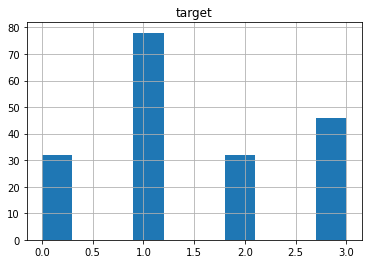

In [ ]:
df.hist()

## Tokenize

In [ ]:
import MeCab

def tokenize(text, target_pos=['名詞', '形容詞', '形容動詞', '動詞', '副詞']):
  tokens = []
  mecab = MeCab.Tagger ('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
  mecab.parse('') #文字列がGCされるのを防ぐ
  node = mecab.parseToNode(text)
  while node:
    #単語を取得
    word = node.surface
    #品詞を取得
    pos = node.feature.split(",")[0]
    # 名詞の場合のみ抽出
    if pos in target_pos:
      tokens.append(word)
    #次の単語に進める
    node = node.next
  return tokens

## 分かち書き

In [ ]:
df['text_wakati'] = df['text'].map(lambda x: ' '.join(tokenize(x)))
df

,text,target,text_wakati
0,これらの例は、SummaRuNNerがドキュメントのキーポイントを特定する上で適度に良い仕事...,0,これら 例 SummaRuNNer ドキュメント キーポイント 特定 する 上 適度 良い ...
1,もう一つの新しい貢献は、抽出モデルの抽象化学習で、人間が生成した参考文献の要約だけで学習する...,0,もう 一つ 新しい 貢献 抽出 モデル 抽象化 学習 人間 生成 し 参考文献 要約 学習 ...
2,ごく最近の研究では、ChengとLapata(0)が、抽出的な単一文書の要約のためのアテンシ...,0,ごく 最近 研究 Cheng Lapata 0 抽出 的 単一 文書 要約 ため アテンショ...
3,また、Infomap のクラスタリングアルゴリズムの代わりに、グラフベースのクラスタリングア...,2,Infomap クラスタリング アルゴリズム 代わり グラフ ベース クラスタリング アルゴ...
4,情報技術とインターネットの出現により、世界は毎秒数テラバイトの情報を生み出しています。,2,情報技術 インターネット 出現 世界 数 テラ バイト 情報 生み出し い
...,...,...,...
183,私たちの研究では、生成モデルの基本的な枠組みとしてVAEを採用しています。,1,私たち 研究 生成 モデル 基本 的 枠組み VAE 採用 し い
184,評価では、教師あり学習に基づく0つの文選択法を提供しています。Support Vector ...,1,評価 教師あり学習 基づく 0 文 選択 法 提供 し い Support Vector R...
185,ランダムベースラインは、各トピックの文章をランダムに選択します。,1,ランダムベースライン トピック 文章 ランダム 選択 し
186,本研究では、潜在的意味空間と観測された項ベクトル空間の再構成を共同で考慮する、教師なしデータ...,1,研究 潜在的 意味 空間 観測 さ れ 項 ベクトル空間 再構成 共同 考慮 する 教師 な...


## 単語埋め込みのために、学習と検証とテストに分割

In [ ]:
from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(df, test_size=0.2, random_state=144, stratify=df['target'])
valid, test = train_test_split(valid_test, test_size=0.5, random_state=144, stratify=valid_test['target'])

# 事例数の確認
print('===学習データ===')
print(train['target'].value_counts())
print('===検証データ===')
print(valid['target'].value_counts())
print('===評価データ===')
print(test['target'].value_counts())

===学習データ===
1    62
3    37
0    26
2    25
Name: target, dtype: int64
===検証データ===
1    8
3    4
2    4
0    3
Name: target, dtype: int64
===評価データ===
1    8
3    5
2    3
0    3
Name: target, dtype: int64


## TF-IDFによるベクトル化

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 1))
vectors = vectorizer.fit_transform(train_df.text)
vectors.shape

(150, 838)

In [ ]:
# TF-IDFによるベクトル化
vectors_test = vectorizer.transform(test_df.text)

## Word2Vecによるベクトル化

In [ ]:
wakati = train[['text_wakati']]
wakati.to_csv('wakati.csv', sep='\n', header=True, index=False)
wakati

,text_wakati
149,研究 Recurrent Neural Network RNN ベース シーケンス モデル ...
10,要約 システム フルサイズ 記事 縮小 し 関連 する 情報 文章 主要 アイデア 中心 的...
116,生成 モデル データ 構築 プロセス 精神 基づい いくつか 潜在 的 アスペクト ベクトル...
187,場合 句読点 削除 さ れ
156,文 名前 つい 実体 削除 する こと 文 ペア ごと 類似 度 測定 値 偏り なくなり ...
...,...
115,生 入力 ストップワード 頻繁 使用 さ れる 記事 接続詞 接続詞 除去 する ため 処理...
117,ごく 最近 研究 Cheng Lapata 0 抽出 的 単一 文書 要約 ため アテンショ...
3,近年 自然言語処理 NLP 非常 堅固 数学 的 基盤 移行 し い
22,SUMMONS Radev McKeown 0 複数 ソース 情報 抽出 結合 し 情報 言...


In [ ]:
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentence_data = word2vec.LineSentence('wakati.csv')
vectorizer = word2vec.Word2Vec(sentence_data,
                         sg=1,        # Skip-gram
                         size=200,    # 次元数
                         min_count=5, # min_count回未満の単語を破棄
                         window=5,    # 文脈の最大単語数
                         hs=1,        # 階層ソフトマックス(ネガティブサンプリングするなら0)
                         negative=5,  # ネガティブサンプリング
                         iter=50      # Epoch数
                         )

In [ ]:
vectorizer.most_similar('研究')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2021-06-21 06:50:41,333 : INFO : precomputing L2-norms of word weight vectors


[('コーパス', 0.8662776947021484),
 ('使用', 0.8247900605201721),
 ('い', 0.7848438024520874),
 ('関連', 0.7839489579200745),
 ('CNN', 0.7731467485427856),
 ('適用', 0.7502363920211792),
 ('こと', 0.7492337226867676),
 ('ドキュメント', 0.7454434633255005),
 ('VAE', 0.7122609615325928),
 ('示し', 0.6909725069999695)]

In [ ]:
import inspect

# vectorizerオブジェクトのメソッド一覧
for x in inspect.getmembers(vectorizer, inspect.ismethod):
  print(x[0])

## 単語埋め込みから特徴ベクトル作成

In [ ]:
import string
import torch

def transform_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  words = text.translate(table).split()  # 記号をスペースに置換後、スペースで分割してリスト化
  vec = [vectorizer[word] for word in words if word in vectorizer]  # 1語ずつベクトル化

  return torch.tensor(sum(vec) / len(vec))  # 平均ベクトルをTensor型に変換して出力

In [ ]:
# 特徴ベクトルの作成
X_train = torch.stack([transform_w2v(text) for text in train['text_wakati']])
X_valid = torch.stack([transform_w2v(text) for text in valid['text_wakati']])
X_test = torch.stack([transform_w2v(text) for text in test['text_wakati']])

print(X_train.size())
print(X_train)

torch.Size([150, 300])
tensor([[ 0.0082,  0.1482,  0.0645,  ...,  0.0595, -0.0429, -0.0154],
        [-0.1112, -0.0050,  0.0784,  ...,  0.0530,  0.0678,  0.0772],
        [-0.1331,  0.0259, -0.0141,  ...,  0.1070,  0.0831,  0.0161],
        ...,
        [-0.0841,  0.0472,  0.0747,  ...,  0.0709, -0.1082, -0.0299],
        [-0.1101,  0.0452, -0.0171,  ...,  0.1383, -0.0479, -0.0441],
        [-0.0954,  0.0727,  0.0907,  ..., -0.0231, -0.0737,  0.0767]])


## ラベルベクトルの作成

In [ ]:
y_train = torch.tensor(train['target'].values)
y_valid = torch.tensor(valid['target'].values)
y_test = torch.tensor(test['target'].values)

print(y_train.size())
print(y_train)

torch.Size([150])
tensor([0, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 2, 0, 1,
        1, 3, 0, 1, 3, 1, 2, 1, 3, 1, 0, 1, 2, 1, 2, 1, 3, 0, 3, 1, 1, 3, 0, 1,
        1, 2, 2, 2, 3, 2, 1, 1, 1, 3, 3, 1, 3, 1, 1, 0, 1, 1, 0, 3, 3, 1, 3, 3,
        2, 2, 3, 0, 1, 0, 1, 2, 0, 2, 1, 1, 3, 1, 3, 0, 3, 2, 3, 1, 0, 1, 3, 1,
        1, 1, 2, 3, 2, 1, 1, 1, 0, 3, 1, 1, 2, 1, 3, 1, 1, 0, 3, 0, 3, 2, 2, 0,
        1, 2, 2, 1, 0, 1, 3, 1, 3, 1, 3, 0, 1, 3, 0, 1, 1, 0, 0, 3, 2, 1, 1, 0,
        1, 2, 0, 3, 3, 1])


## Word2Vecによるベクトル化（ChiVe）

In [ ]:
import gensim
import urllib.request
import sys

#ダウンロード
url = "https://sudachi.s3-ap-northeast-1.amazonaws.com/chive/chive-1.2-mc90_gensim.tar.gz"  #ファイルのURLを指定
urllib.request.urlretrieve(url,"chive.tar.gz")
#解凍
!tar -zxvf chive.tar.gz

vectorizer = gensim.models.KeyedVectors.load("chive-1.2-mc90_gensim/chive-1.2-mc90.kv")

chive-1.2-mc90_gensim/
chive-1.2-mc90_gensim/LICENSE
chive-1.2-mc90_gensim/README.md
chive-1.2-mc90_gensim/chive-1.2-mc90.kv.vectors.npy
chive-1.2-mc90_gensim/chive-1.2-mc90.kv


2021-06-21 06:53:01,262 : INFO : loading Word2VecKeyedVectors object from chive-1.2-mc90_gensim/chive-1.2-mc90.kv
2021-06-21 06:53:03,544 : INFO : loading vectors from chive-1.2-mc90_gensim/chive-1.2-mc90.kv.vectors.npy with mmap=None
2021-06-21 06:53:04,165 : INFO : setting ignored attribute vectors_norm to None
2021-06-21 06:53:04,167 : INFO : loaded chive-1.2-mc90_gensim/chive-1.2-mc90.kv


In [ ]:
vectorizer.similarity('ゼロ', '零')

0.42525005

In [ ]:
vectorizer.most_similar('ゼロ')

2021-06-21 06:18:37,679 : INFO : precomputing L2-norms of word weight vectors


[('皆無', 0.5345298051834106),
 ('限り無い', 0.5146239995956421),
 ('等しい', 0.5105463266372681),
 ('zero', 0.48313069343566895),
 ('0', 0.4786607027053833),
 ('ルイズゴスパンク', 0.45806729793548584),
 ('使い魔', 0.4574781060218811),
 ('ナッシング', 0.4523527920246124),
 ('シュナイゼル', 0.43490493297576904),
 ('零', 0.42524999380111694)]

## ベクトルをDFに変換

In [ ]:
# ベクトルをデータフレームに変換
train_text_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
test_text_df = pd.DataFrame(vectors_test.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
train_text_df.head()

,"""",""")",$,&,(,),)),))、,)、,)。,",",-,.,".""",/,0,:,:(,;,[,],][,_,a,absphrase,administration,adversarial,al,amish,an,and,auto,autoencoders,bahdanau,barzilay,baseline,bbc,beautifulsoup,before,bengio,...,通り,通常,連続,進め,遅,過去,達成,適度,適用,選択,部,部分,重み,重み付け,重要,量,鈍感,長,間,関わる,関係,関連,閾値,限り,除去,際,隣接,集合,難しい,非常,頂点,項,頻度,頻繁,類似,食品,駆動,高い,高度,魅力
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22841,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.217562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.536577,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_text_df.head()

,"""",""")",$,&,(,),)),))、,)、,)。,",",-,.,".""",/,0,:,:(,;,[,],][,_,a,absphrase,administration,adversarial,al,amish,an,and,auto,autoencoders,bahdanau,barzilay,baseline,bbc,beautifulsoup,before,bengio,...,通り,通常,連続,進め,遅,過去,達成,適度,適用,選択,部,部分,重み,重み付け,重要,量,鈍感,長,間,関わる,関係,関連,閾値,限り,除去,際,隣接,集合,難しい,非常,頂点,項,頻度,頻繁,類似,食品,駆動,高い,高度,魅力
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.138841,0.149614,0.0,0.0,0.000000,0.0,0.363873,0.000000,0.0,0.0,0.0,0.126108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.201736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.249301,0.089548,0.0,0.0,0.344668,0.0,0.217789,0.303018,0.0,0.0,0.0,0.301918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262902,0.0,0.0,0.120745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.115752,0.124733,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 学習 => 予測 => 精度表示

In [ ]:
def learn_pred_accuracy(clf, train_x, train_y, valid_x, valid_y, test_x, test_y):
  # 学習
  clf.fit(train_x, train_y)
  # 予測
  predict_vy = clf.predict(valid_x)
  predict_y = clf.predict(test_x)
  # 正解率
  print('検証True:', np.count_nonzero(predict_vy == valid_y))
  print('検証False:', np.count_nonzero(predict_vy != valid_y))
  print('検証正解率:', np.count_nonzero(predict_vy == valid_y) / len(valid_y))
  print('テストTrue:', np.count_nonzero(predict_y == test_y))
  print('テストFalse:', np.count_nonzero(predict_y != test_y))
  print('テスト正解率:', np.count_nonzero(predict_y == test_y) / len(test_y))
  # 様々な精度結果
  print(classification_report(test_y, predict_y))
  # 正解と予測データ
  print('検証正解：', valid_y)
  print('検証予測：', predict_vy)
  print('test正解：', test_y)
  print('test予測：', predict_y)
  # 予測データのヒストグラム
  plt.hist(predict_vy)
  plt.show()
  plt.hist(predict_y)

## 各データをnp.array化

In [ ]:
train_x = np.array(train_text_df)
train_y = np.array(train_df.target)
test_x = np.array(test_text_df)
test_y = np.array(test_df.target)

## 正解データのヒストグラム

(array([3., 0., 0., 8., 0., 0., 3., 0., 0., 5.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

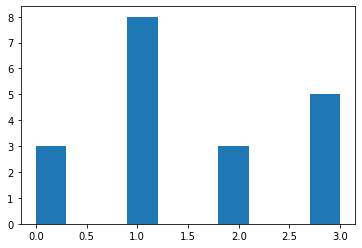

In [ ]:
plt.hist(y_test)

## Naive Bayes

検証True: 9
検証False: 10
検証正解率: 0.47368421052631576
テストTrue: 11
テストFalse: 8
テスト正解率: 0.5789473684210527
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89         8
           2       0.33      0.33      0.33         3
           3       0.33      0.40      0.36         5

    accuracy                           0.58        19
   macro avg       0.37      0.43      0.40        19
weighted avg       0.48      0.58      0.52        19

検証正解： [0 1 2 1 1 1 1 2 1 3 3 1 2 0 2 3 3 0 1]
検証予測： [0 1 3 1 1 0 1 3 1 2 3 3 3 1 1 3 3 1 2]
test正解： [1 1 3 2 1 3 0 1 1 1 1 2 0 3 0 1 3 2 3]
test予測： [1 1 1 2 1 3 3 1 1 1 1 3 3 2 3 1 3 1 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


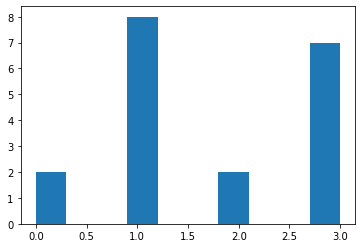

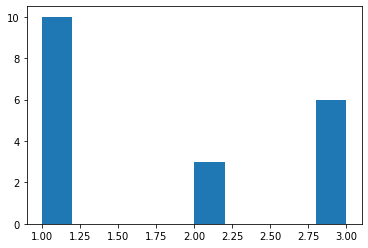

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import preprocessing

clf = MultinomialNB(alpha=.01)
mm = preprocessing.MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_valid_mm = mm.transform(X_valid)
X_test_mm = mm.transform(X_test)
mm = preprocessing.MinMaxScaler()
learn_pred_accuracy(clf, X_train_mm, y_train, X_valid_mm, np.array(y_valid), X_test_mm, np.array(y_test))

## DecisionTreeClassifier

検証True: 10
検証False: 9
検証正解率: 0.5263157894736842
テストTrue: 9
テストFalse: 10
テスト正解率: 0.47368421052631576
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.70      0.88      0.78         8
           2       0.00      0.00      0.00         3
           3       0.33      0.40      0.36         5

    accuracy                           0.47        19
   macro avg       0.26      0.32      0.29        19
weighted avg       0.38      0.47      0.42        19

検証正解： [0 1 2 1 1 1 1 2 1 3 3 1 2 0 2 3 3 0 1]
検証予測： [0 1 2 0 0 1 1 1 1 3 0 1 3 1 1 3 3 1 3]
test正解： [1 1 3 2 1 3 0 1 1 1 1 2 0 3 0 1 3 2 3]
test予測： [1 1 1 0 0 1 3 1 1 1 1 3 2 3 3 1 3 3 1]


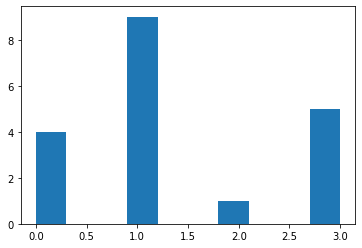

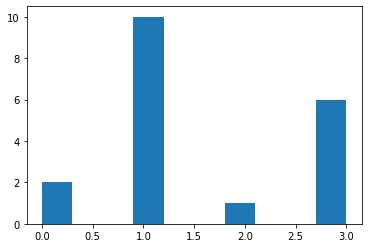

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=144)
learn_pred_accuracy(clf, X_train, y_train, X_valid, np.array(y_valid), X_test, np.array(y_test))

## XGBoost

検証True: 10
検証False: 9
検証正解率: 0.5263157894736842
テストTrue: 12
テストFalse: 7
テスト正解率: 0.631578947368421
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89         8
           2       0.50      0.67      0.57         3
           3       0.50      0.40      0.44         5

    accuracy                           0.63        19
   macro avg       0.45      0.52      0.48        19
weighted avg       0.55      0.63      0.58        19

検証正解： [0 1 2 1 1 1 1 2 1 3 3 1 2 0 2 3 3 0 1]
検証予測： [0 1 2 1 1 0 1 0 1 2 3 3 3 1 1 1 3 1 1]
test正解： [1 1 3 2 1 3 0 1 1 1 1 2 0 3 0 1 3 2 3]
test予測： [1 1 0 2 1 3 3 1 1 1 1 2 3 2 2 1 3 1 1]


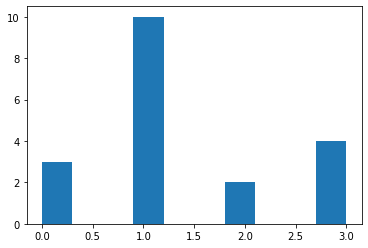

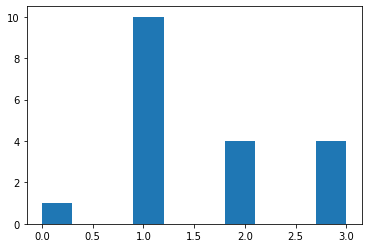

In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=144, objective='binary:logistic')
learn_pred_accuracy(clf, X_train, y_train, X_valid, np.array(y_valid), X_test, np.array(y_test))

## ロジスティック回帰

検証True: 10
検証False: 9
検証正解率: 0.5263157894736842
テストTrue: 11
テストFalse: 8
テスト正解率: 0.5789473684210527
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89         8
           2       0.33      0.33      0.33         3
           3       0.33      0.40      0.36         5

    accuracy                           0.58        19
   macro avg       0.37      0.43      0.40        19
weighted avg       0.48      0.58      0.52        19

検証正解： [0 1 2 1 1 1 1 2 1 3 3 1 2 0 2 3 3 0 1]
検証予測： [0 1 3 1 1 0 1 3 1 2 3 1 3 1 1 3 3 1 2]
test正解： [1 1 3 2 1 3 0 1 1 1 1 2 0 3 0 1 3 2 3]
test予測： [1 1 1 2 1 3 3 1 1 1 1 3 3 2 3 1 3 1 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


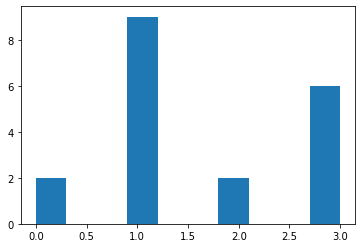

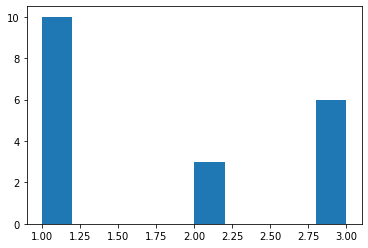

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=144, max_iter=144000)
learn_pred_accuracy(clf, X_train, y_train, X_valid, np.array(y_valid), X_test, np.array(y_test))

## 単層ニューラルネットワーク（SLPNet）

In [ ]:
from torch import nn

class SLPNet(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.fc = nn.Linear(input_size, output_size, bias=False)
    nn.init.normal_(self.fc.weight, 0.0, 1.0)  # 正規乱数で重みを初期化

  def forward(self, x):
    x = self.fc(x)
    return x

In [ ]:
input_size = len(X_train.T)
mid_size = len(X_valid.T)
output_size = df['target'].nunique()
model = SLPNet(input_size, output_size)  # 単層ニューラルネットワークの初期化
y_hat = torch.softmax(model(X_train[:output_size]), dim=-1)
print(y_hat)

tensor([[0.0029, 0.9361, 0.0451, 0.0159],
        [0.0025, 0.0979, 0.6613, 0.2384],
        [0.0143, 0.5575, 0.1339, 0.2943],
        [0.1380, 0.1521, 0.3306, 0.3793]], grad_fn=<SoftmaxBackward>)


In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
l = criterion(model(X_train[:output_size]), torch.tensor(list(y_train))[:output_size])  # 入力ベクトルはsoftmax前の値
model.zero_grad()  # 勾配をゼロで初期化
l.backward()  # 勾配を計算
print(f'損失: {l:.4f}')
print(f'勾配:\n{model.fc.weight.grad}')

損失: 1.9868
勾配:
tensor([[-0.0003, -0.0339, -0.0167,  ..., -0.0128,  0.0099,  0.0029],
        [ 0.0165,  0.0349,  0.0179,  ...,  0.0052, -0.0188, -0.0047],
        [-0.0061, -0.0112, -0.0033,  ..., -0.0083,  0.0021, -0.0010],
        [-0.0101,  0.0102,  0.0021,  ...,  0.0158,  0.0068,  0.0028]])


In [ ]:
from torch.utils.data import Dataset

class NewsDataset(Dataset):
  def __init__(self, X, y):  # datasetの構成要素を指定
    self.X = X
    self.y = y

  def __len__(self):  # len(dataset)で返す値を指定
    return len(self.y)

  def __getitem__(self, idx):  # dataset[idx]で返す値を指定
    return [self.X[idx], self.y[idx]]

In [ ]:
from torch.utils.data import DataLoader

# Datasetの作成
dataset_train = NewsDataset(X_train, y_train)
dataset_valid = NewsDataset(X_valid, y_valid)
dataset_test = NewsDataset(X_test, y_test)

# Dataloaderの作成
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

In [ ]:
# モデルの定義
model = SLPNet(input_size, output_size)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 100
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  loss_train = 0.0
  for i, (inputs, labels) in enumerate(dataloader_train):
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # 損失を記録
    loss_train += loss.item()

  # バッチ単位の平均損失計算
  loss_train = loss_train / i

  # 検証データの損失計算
  model.eval() 
  with torch.no_grad():
    inputs, labels = next(iter(dataloader_valid))
    outputs = model(inputs)
    loss_valid = criterion(outputs, labels)

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, loss_valid: {loss_valid:.4f}')  

epoch: 1, loss_train: 1.7003, loss_valid: 1.7295
epoch: 2, loss_train: 1.4669, loss_valid: 1.6304
epoch: 3, loss_train: 1.2983, loss_valid: 1.6555
epoch: 4, loss_train: 1.2069, loss_valid: 1.6065
epoch: 5, loss_train: 1.1026, loss_valid: 1.5363
epoch: 6, loss_train: 1.0446, loss_valid: 1.5373
epoch: 7, loss_train: 0.9823, loss_valid: 1.5118
epoch: 8, loss_train: 0.9108, loss_valid: 1.5073
epoch: 9, loss_train: 0.8778, loss_valid: 1.4799
epoch: 10, loss_train: 0.8473, loss_valid: 1.4814
epoch: 11, loss_train: 0.8015, loss_valid: 1.4659
epoch: 12, loss_train: 0.7761, loss_valid: 1.4592
epoch: 13, loss_train: 0.7391, loss_valid: 1.4518
epoch: 14, loss_train: 0.7199, loss_valid: 1.4528
epoch: 15, loss_train: 0.6998, loss_valid: 1.4761
epoch: 16, loss_train: 0.6816, loss_valid: 1.4240
epoch: 17, loss_train: 0.6582, loss_valid: 1.5075
epoch: 18, loss_train: 0.6366, loss_valid: 1.4133
epoch: 19, loss_train: 0.6173, loss_valid: 1.4573
epoch: 20, loss_train: 0.6094, loss_valid: 1.4315
epoch: 21

In [ ]:
def calculate_accuracy(model, loader):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return correct / total

In [ ]:
acc_train = calculate_accuracy(model, dataloader_train)
acc_test = calculate_accuracy(model, dataloader_test)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')

正解率（学習データ）：0.987
正解率（評価データ）：0.632


In [ ]:
def calculate_loss_and_accuracy(model, criterion, loader):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total

In [ ]:
# モデルの定義
model = SLPNet(input_size, output_size)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 100
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')  

epoch: 1, loss_train: 1.4301, accuracy_train: 0.3867, loss_valid: 1.2480, accuracy_valid: 0.5263
epoch: 2, loss_train: 1.3158, accuracy_train: 0.4533, loss_valid: 1.2101, accuracy_valid: 0.4211
epoch: 3, loss_train: 1.1540, accuracy_train: 0.5067, loss_valid: 1.1948, accuracy_valid: 0.5789
epoch: 4, loss_train: 1.0683, accuracy_train: 0.5400, loss_valid: 1.1770, accuracy_valid: 0.5263
epoch: 5, loss_train: 0.9958, accuracy_train: 0.5933, loss_valid: 1.1977, accuracy_valid: 0.5789
epoch: 6, loss_train: 0.9486, accuracy_train: 0.6067, loss_valid: 1.2151, accuracy_valid: 0.6316
epoch: 7, loss_train: 0.9425, accuracy_train: 0.6267, loss_valid: 1.1638, accuracy_valid: 0.4737
epoch: 8, loss_train: 0.8856, accuracy_train: 0.6333, loss_valid: 1.1508, accuracy_valid: 0.4737
epoch: 9, loss_train: 0.8670, accuracy_train: 0.6333, loss_valid: 1.2501, accuracy_valid: 0.4737
epoch: 10, loss_train: 0.7986, accuracy_train: 0.7333, loss_valid: 1.1904, accuracy_valid: 0.5263
epoch: 11, loss_train: 0.7795

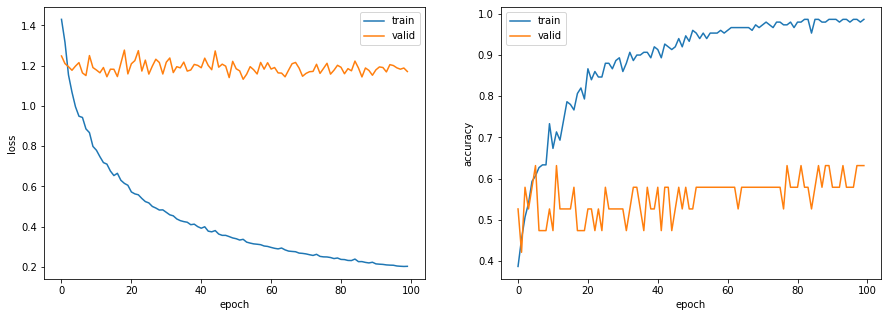

In [ ]:
from matplotlib import pyplot as plt

# 視覚化
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log_train).T[0], label='train')
ax[0].plot(np.array(log_valid).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log_train).T[1], label='train')
ax[1].plot(np.array(log_valid).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

## 多層ニューラルネットワーク（MLPNet）

In [ ]:
from torch.nn import functional as F

class MLPNet(nn.Module):
  def __init__(self, input_size, mid_size, output_size, mid_layers):
    super().__init__()
    self.mid_layers = mid_layers
    self.fc = nn.Linear(input_size, mid_size)
    self.fc_mid = nn.Linear(mid_size, mid_size)
    self.fc_out = nn.Linear(mid_size, output_size) 
    self.bn = nn.BatchNorm1d(mid_size)

  def forward(self, x):
    x = F.relu(self.fc(x))
    for _ in range(self.mid_layers):
      x = F.relu(self.bn(self.fc_mid(x)))
    x = F.relu(self.fc_out(x))

    return x

In [ ]:
from torch import optim
import time

def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # スケジューラの設定
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=1e-5, last_epoch=-1)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

    # 検証データの損失が3エポック連続で低下しなかった場合は学習終了
    if epoch > 2 and log_valid[epoch - 3][0] <= log_valid[epoch - 2][0] <= log_valid[epoch - 1][0] <= log_valid[epoch][0]:
      break

    # スケジューラを1ステップ進める
    scheduler.step()

  return {'train': log_train, 'valid': log_valid}

In [ ]:
# datasetの作成
dataset_train = NewsDataset(X_train, y_train)
dataset_valid = NewsDataset(X_valid, y_valid)

# モデルの定義
model = MLPNet(input_size, mid_size, output_size, 1)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
log = train_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, 1000)

epoch: 1, loss_train: 1.3869, accuracy_train: 0.2467, loss_valid: 1.3871, accuracy_valid: 0.2105, 0.0387sec
epoch: 2, loss_train: 1.3869, accuracy_train: 0.2467, loss_valid: 1.3869, accuracy_valid: 0.2105, 0.0205sec
epoch: 3, loss_train: 1.3854, accuracy_train: 0.2467, loss_valid: 1.3868, accuracy_valid: 0.2105, 0.0200sec
epoch: 4, loss_train: 1.3856, accuracy_train: 0.2467, loss_valid: 1.3867, accuracy_valid: 0.2105, 0.0184sec
epoch: 5, loss_train: 1.3866, accuracy_train: 0.2467, loss_valid: 1.3867, accuracy_valid: 0.2105, 0.0174sec
epoch: 6, loss_train: 1.3857, accuracy_train: 0.2400, loss_valid: 1.3868, accuracy_valid: 0.2105, 0.0175sec
epoch: 7, loss_train: 1.3867, accuracy_train: 0.2467, loss_valid: 1.3869, accuracy_valid: 0.2105, 0.0172sec


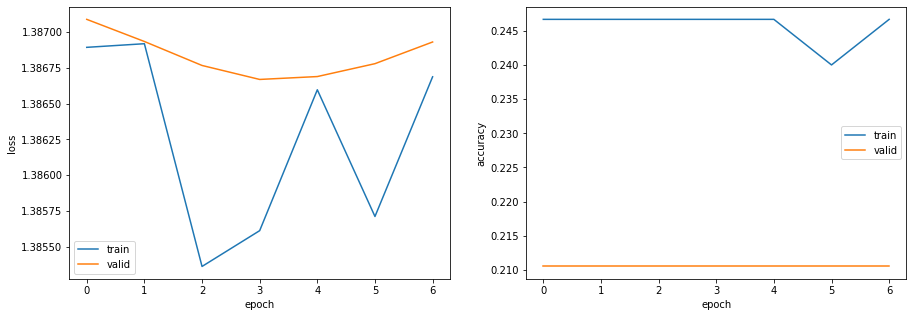

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log['train']).T[0], label='train')
ax[0].plot(np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log['train']).T[1], label='train')
ax[1].plot(np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [ ]:
# 正解率の確認
acc_train = calculate_accuracy(model, dataloader_train)
acc_test = calculate_accuracy(model, dataloader_test)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')

正解率（学習データ）：0.247
正解率（評価データ）：0.263
